# Statistical Modeling of Gutenberg–Richter Law in Earthquake Data
This project will analyze the Gutenberg–Richter frequency–magnitude relationship using Balkan (1904–2025) earthquake data, with potential comparison to California and Japan. 


#### *Data preprocessing*

In [58]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msn
import numpy as np 
import math 

In [28]:
df = pd.read_csv("data/south_central_balkan.csv")
df.sample(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2378,1986-11-01T18:59:04.010Z,42.333,19.937,10.0,2.6,ml,NaN,NaN,NaN,0.9,...,2014-11-07T00:39:16.473Z,"26 km SSE of Gusinje, Montenegro",earthquake,NaN,NaN,NaN,NaN,reviewed,us,ttg
2159,1988-08-14T01:01:27.830Z,42.276,19.908,10.0,2.5,ml,NaN,NaN,NaN,0.6,...,2014-11-07T00:42:40.268Z,"25 km NNW of Fushë-Arrëz, Albania",earthquake,NaN,NaN,NaN,NaN,reviewed,us,ttg
1765,1991-11-18T12:48:45.240Z,44.282,21.409,5.0,3.2,ml,NaN,NaN,NaN,1.1,...,2014-11-07T00:49:35.221Z,"27 km ENE of Lapovo, Serbia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,ttg


In [29]:
df["magType"].value_counts()

magType
ml      1679
md       847
mb       508
m         58
mw        57
mwr       20
mww       13
mwc       12
ms         2
mblg       1
Name: count, dtype: int64

In [30]:
df["time"] = pd.to_datetime(df["time"]) # Transform time column to hold Pandas DateTime objects 
df.drop_duplicates(inplace=True) # Drop duplicates if any exist 

In [31]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2330
gap                2411
dmin               3027
rms                 961
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3025
depthError         2697
magError           2972
magNst             2734
status                0
locationSource        0
magSource             0
dtype: int64

<Axes: >

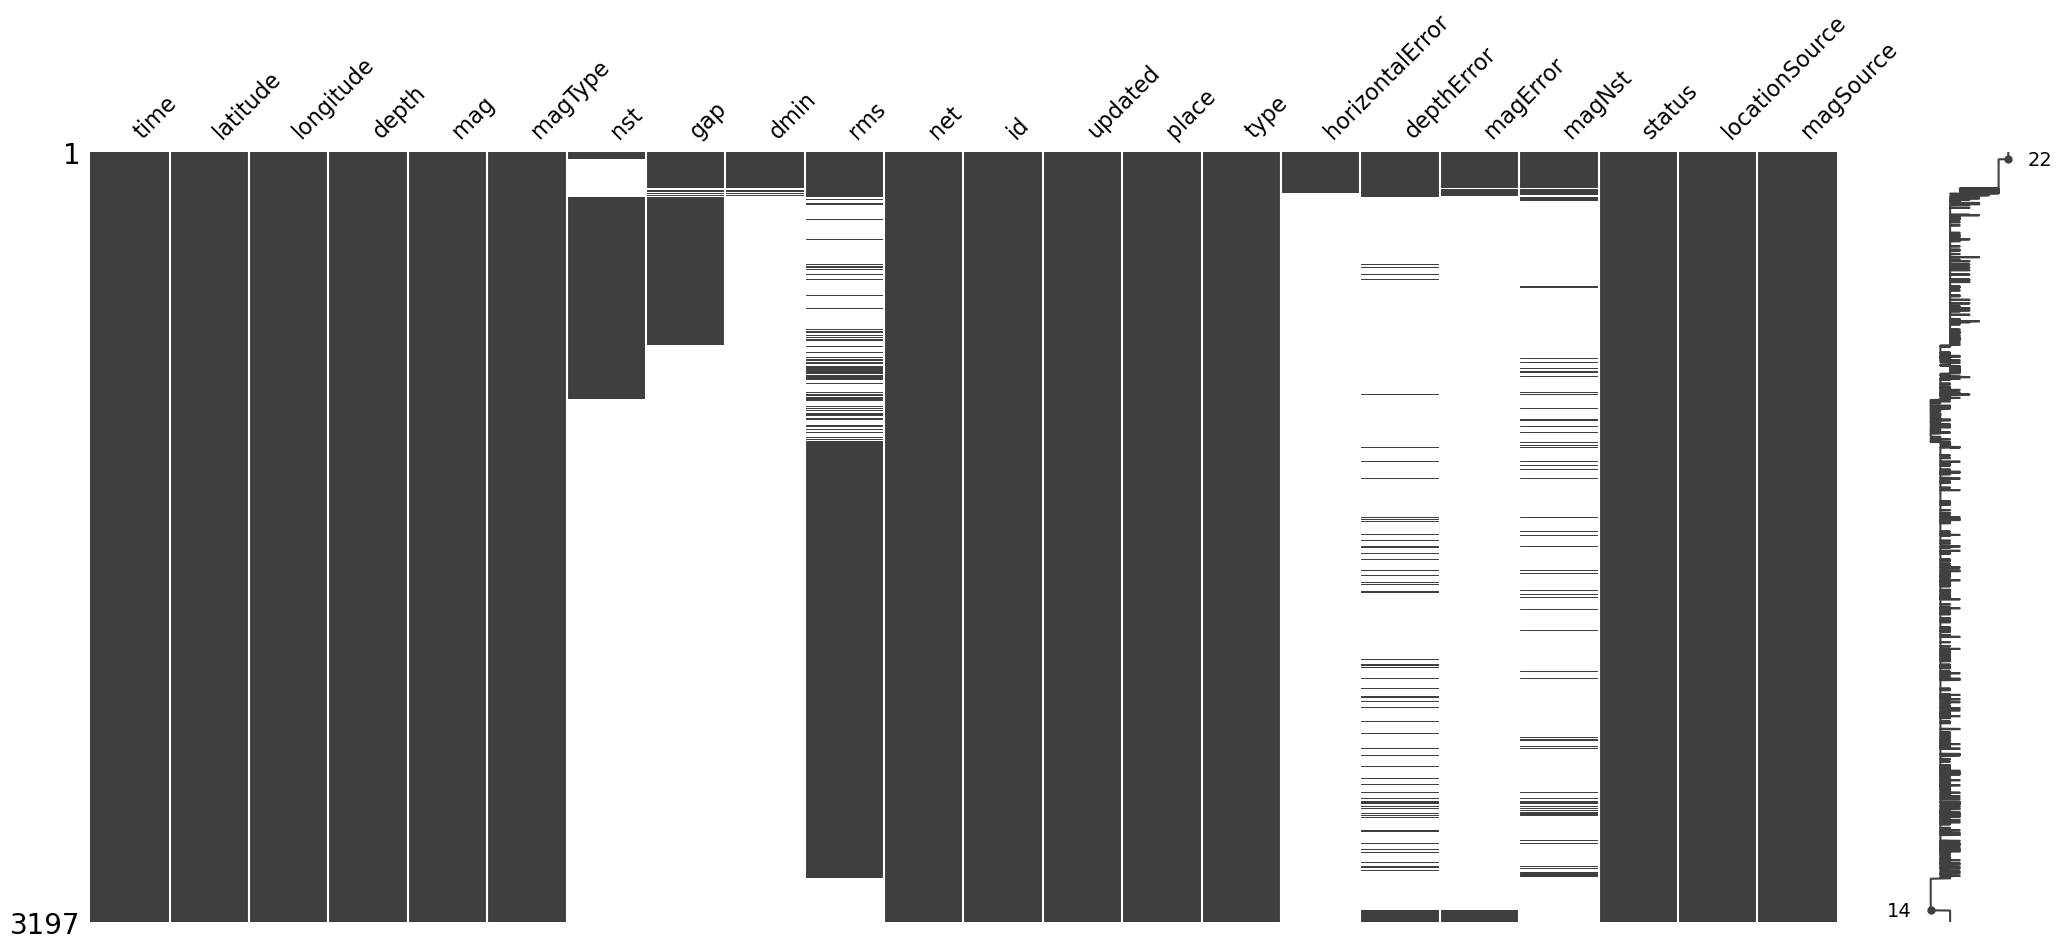

In [32]:
msn.matrix(df)

In [33]:
drop_columns = ["nst", "gap", "dmin", "rms", "horizontalError", "depthError", "magError", "magNst"]
df.drop(columns = drop_columns, inplace = True)

### *EDA and Visualization*

##### *General histogram of earthquake magnitudes*

<Axes: xlabel='mag', ylabel='Count'>

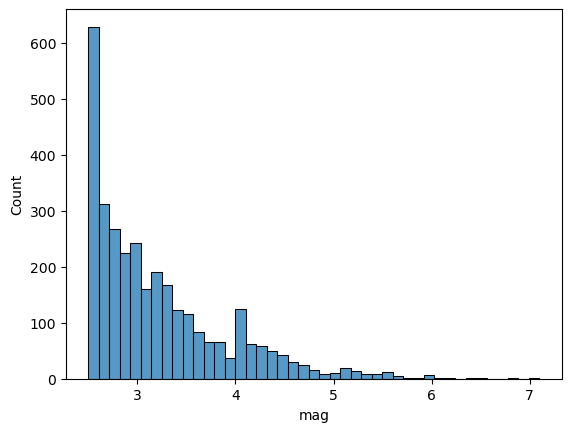

In [ ]:
magnitudes = df["mag"] 
sns.histplot(magnitudes) 

##### *Empirical Gutenberg-Richter plot*

In [120]:
bins = [i for i in range(2,8)]  

M_vals = np.linspace(start=2.5, stop=7, num=1000)
M_indices = [i for i in range(len(M_vals))]
counts = [0] * len(M_indices)

j=0 
for M in M_vals:
    for magnitude in magnitudes:
        if magnitude >= M: 
            counts[j] += 1 
    j+=1   


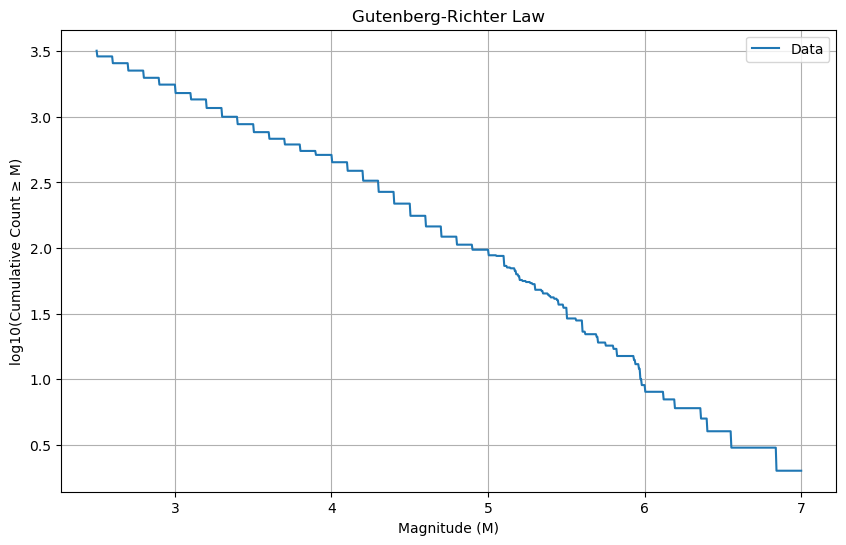

In [121]:
plt.figure(figsize=(10,6))
plt.plot(M_vals, np.log10(counts), label='Data')
plt.xlabel('Magnitude (M)')
plt.ylabel('log10(Cumulative Count ≥ M)')
plt.title('Gutenberg-Richter Law')
plt.grid(True)
plt.legend()
plt.show()